In [1]:
from keras import layers

Using TensorFlow backend.


In [2]:
import numpy as np
import h5py

In [3]:
from keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [4]:
def load_dataset():
    train_data = h5py.File('C:/Users/a.ezhilarasan/Documents/AI/DeepLearning/CNN/happyhouse_keras/train_happy.h5')
    train_x = np.array(train_data['train_set_x'][:])
    train_y = np.array(train_data['train_set_y'][:])
    test_data = h5py.File('C:/Users/a.ezhilarasan/Documents/AI/DeepLearning/CNN/happyhouse_keras/test_happy.h5')
    test_x = np.array(test_data['test_set_x'][:])
    test_y = np.array(test_data['test_set_y'][:])
    train_y = train_y.reshape((1,train_y.shape[0]))
    test_y = test_y.reshape((1,test_y.shape[0]))
    return train_x, train_y, test_x, test_y
    

In [5]:
x_train, y_train, x_test, y_test = load_dataset()

In [6]:
print("shape of x_train: ", x_train.shape)
print("shape of y_train: ", y_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (600, 64, 64, 3)
shape of y_train:  (1, 600)
shape of x_test:  (150, 64, 64, 3)
shape of y_test:  (1, 150)


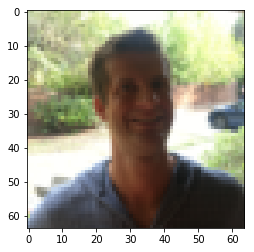

In [7]:
img1 = x_train[1].reshape((64,64,3))
plt.imshow(img1)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
y_train = y_train.T
y_test = y_test.T

In [10]:
x_train.shape[1:]

(64, 64, 3)

In [11]:
def model(input_shape):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3,3))(X_input)
    X = Conv2D(32, (7,7), strides = (1,1), name='conv0')(X)
    X = BatchNormalization(axis = 3, name='bn0')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2,2), name = 'max_pool')(X)
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    model = Model(inputs = X_input, outputs = X, name='Happymodel')
    return model

In [12]:
happy_model = model(x_train.shape[1:])
happy_model.compile('adam', 'binary_crossentropy',metrics=['accuracy'])
happy_model.fit(x_train, y_train, epochs = 10, batch_size = 50)
preds = happy_model.evaluate(x_test, y_test, batch_size = 32, verbose=1, sample_weight = None)


Epoch 1/10
600/600 [==============================] - 16s 26ms/step - loss: 2.3593 - acc: 0.5650
Epoch 2/10
600/600 [==============================] - 15s 25ms/step - loss: 0.5161 - acc: 0.8100
Epoch 3/10
600/600 [==============================] - 16s 27ms/step - loss: 0.2045 - acc: 0.9167
Epoch 4/10
600/600 [==============================] - 17s 28ms/step - loss: 0.1577 - acc: 0.9467
Epoch 5/10
600/600 [==============================] - 14s 23ms/step - loss: 0.1294 - acc: 0.9600
Epoch 6/10
600/600 [==============================] - 14s 23ms/step - loss: 0.1115 - acc: 0.9700
Epoch 7/10
600/600 [==============================] - 16s 26ms/step - loss: 0.0866 - acc: 0.9750
Epoch 8/10
600/600 [==============================] - 14s 24ms/step - loss: 0.0754 - acc: 0.9833
Epoch 9/10
600/600 [==============================] - 16s 26ms/step - loss: 0.0746 - acc: 0.9783
Epoch 10/10
150/150 [==============================] - 1s 8ms/step


In [13]:
print("Loss: ", preds[0])
print("Accuracy: ", preds[1])

Loss:  0.2248216478029887
Accuracy:  0.8999999992052714


In [13]:
preds

[0.15746669133504232, 0.9399999976158142]

In [14]:
from IPython.display import display
from PIL import Image

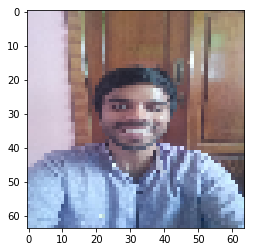

In [15]:
img_path = 'C:/Users/a.ezhilarasan/Documents/AI/DeepLearning/CNN/happyhouse_keras/my_happy.jpg'
img = image.load_img(img_path, target_size=(64,64))
imshow(img)


In [16]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(happy_model.predict(x))

[[1.]]


In [28]:
#another prediction
img_path2 = 'C:/Users/a.ezhilarasan/Documents/AI/DeepLearning/CNN/happyhouse_keras/pulikesi_angry.jpg'
img2 = image.load_img(img_path2, target_size=(64,64))
imshow(img2)dsd

SyntaxError: invalid syntax (<ipython-input-28-94205b9031d9>, line 4)

In [ ]:
!conda install Pillow

In [24]:
x2 = image.img_to_array(img2)
x2 = np.expand_dims(x2, axis=0)
x2 = preprocess_input(x2)
print(happy_model.predict(x2))

[[1.]]


In [23]:
x2 = x2/255

In [25]:
x2.shape

(1, 64, 64, 3)

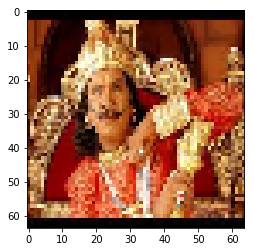

In [17]:
img_path3 = 'C:/Users/a.ezhilarasan/Documents/AI/DeepLearning/CNN/happyhouse_keras/pulikesi_angry.jpg'
img3 = image.load_img(img_path3, target_size=(64,64))
imshow(img3)

In [18]:
x3 = image.img_to_array(img3)
x3 = np.expand_dims(x3, axis=0)
x3 = preprocess_input(x3)
print(happy_model.predict(x3))

[[1.]]


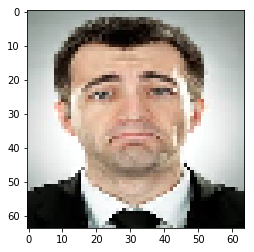

In [24]:
#another prediction
img_path4 = 'C:/Users/a.ezhilarasan/Documents/AI/DeepLearning/CNN/happyhouse_keras/sad.jpg'
img4 = image.load_img(img_path4, target_size=(64,64))
imshow(img4)

In [25]:
x4 = image.img_to_array(img4)
x4 = np.expand_dims(x4, axis=0)
x4 = preprocess_input(x4)
print(happy_model.predict(x4))

[[1.]]
